In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
print("Visualization libraries imported and style set.")

Visualization libraries imported and style set.


--- Files Loaded Successfully ---

'List of Orders' Columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      500 non-null    object        
 1   Order Date    500 non-null    datetime64[ns]
 2   CustomerName  500 non-null    object        
 3   State         500 non-null    object        
 4   City          500 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 19.7+ KB

'Order Details' Columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object

/tmp/ipython-input-791306727.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


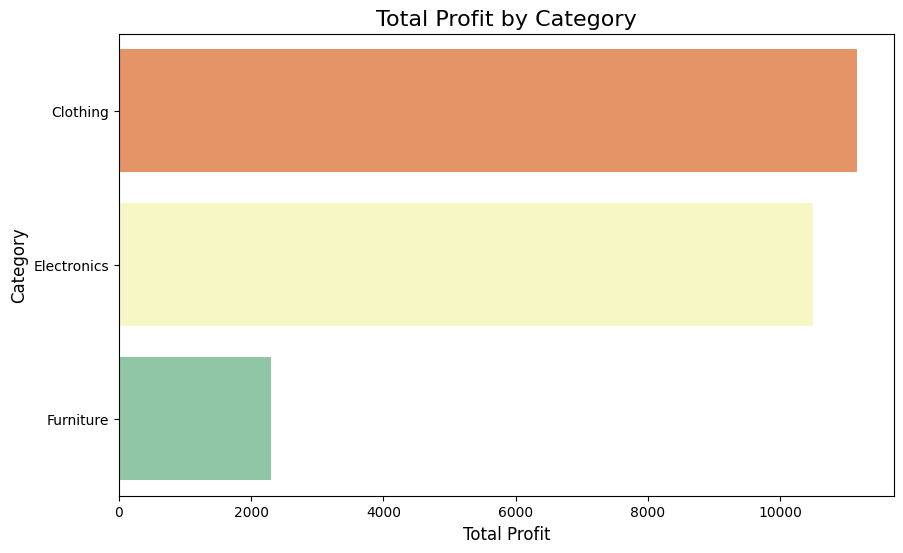

/tmp/ipython-input-791306727.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


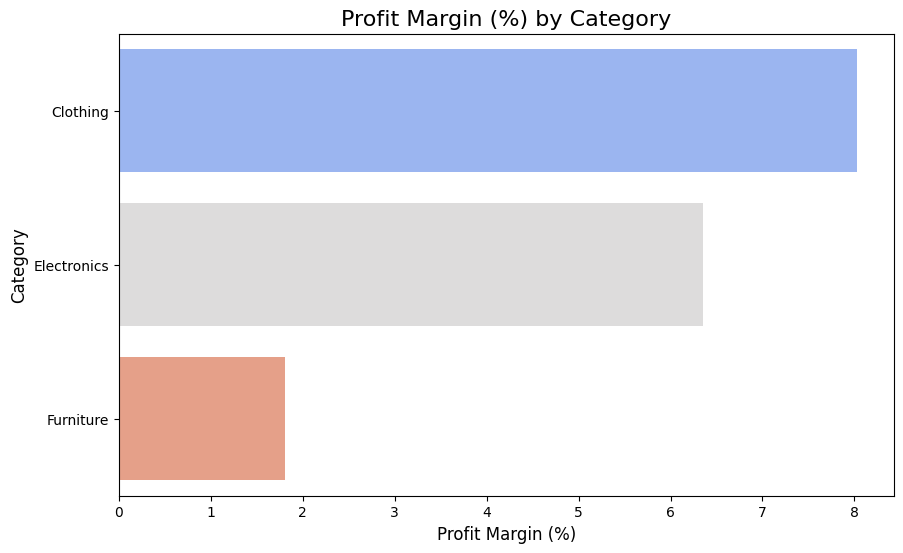

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Data ---
df_orders = pd.read_excel('/content/List_of_Orders_1.xlsx')
df_details = pd.read_excel('/content/Order_Details_1.xlsx')
df_targets = pd.read_excel('/content/Sales_target_1.xlsx')

print("--- Files Loaded Successfully ---")
print("\n'List of Orders' Columns:")
df_orders.info()
print("\n'Order Details' Columns:")
df_details.info()
print("\n'Sales Target' Columns:")
df_targets.info()

# --- Part 1: Calculations (Needed for Visuals) ---
print("\n\n--- === Part 1: Sales and Profitability Analysis === ---")

df_merged = pd.merge(df_orders, df_details, on='Order ID')

category_sales = df_merged.groupby('Category')['Amount'].sum()
category_profit = df_merged.groupby('Category')['Profit'].sum()

category_profit_margin = (category_profit / category_sales) * 100
category_profit_margin = category_profit_margin.rename("Profit Margin (%)")

order_profit = df_merged.groupby(['Category', 'Order ID'])['Profit'].sum()
avg_profit_per_order = order_profit.groupby('Category').mean()
avg_profit_per_order = avg_profit_per_order.rename("Avg. Profit per Order")

df_category_performance = pd.DataFrame({
    'Total Sales': category_sales,
    'Total Profit': category_profit,
    'Profit Margin (%)': category_profit_margin,
    'Avg. Profit per Order': avg_profit_per_order
})

df_category_performance = df_category_performance.sort_values(by='Total Profit', ascending=False)

print("\n--- Overall Category Performance ---")
print(df_category_performance)

# --- Part 1: Visuals ---
print("\n\n--- === Part 1: Category Performance Visuals === ---")

df_category_plot = df_category_performance.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_category_plot.sort_values(by='Total Profit', ascending=False),
    x='Total Profit',
    y='Category',
    palette='Spectral'
)
plt.title('Total Profit by Category', fontsize=16)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_category_plot.sort_values(by='Profit Margin (%)', ascending=False),
    x='Profit Margin (%)',
    y='Category',
    palette='coolwarm'
)
plt.title('Profit Margin (%) by Category', fontsize=16)
plt.xlabel('Profit Margin (%)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()



--- === Part 2: Target Achievement Analysis === ---

--- Furniture Target Analysis (Month-over-Month) ---
   Month of Order Date  Target  Target % Change (MoM)
9           2025-01-19   11500                    NaN
10          2025-02-19   11600               0.869565
11          2025-03-19   11800               1.724138
0           2025-04-18   10400             -11.864407
1           2025-05-18   10500               0.961538
2           2025-06-18   10600               0.952381
3           2025-07-18   10800               1.886792
4           2025-08-18   10900               0.925926
5           2025-09-18   11000               0.917431
6           2025-10-18   11100               0.909091
7           2025-11-18   11300               1.801802
8           2025-12-18   11400               0.884956


--- === Part 2: Furniture Target Visuals === ---


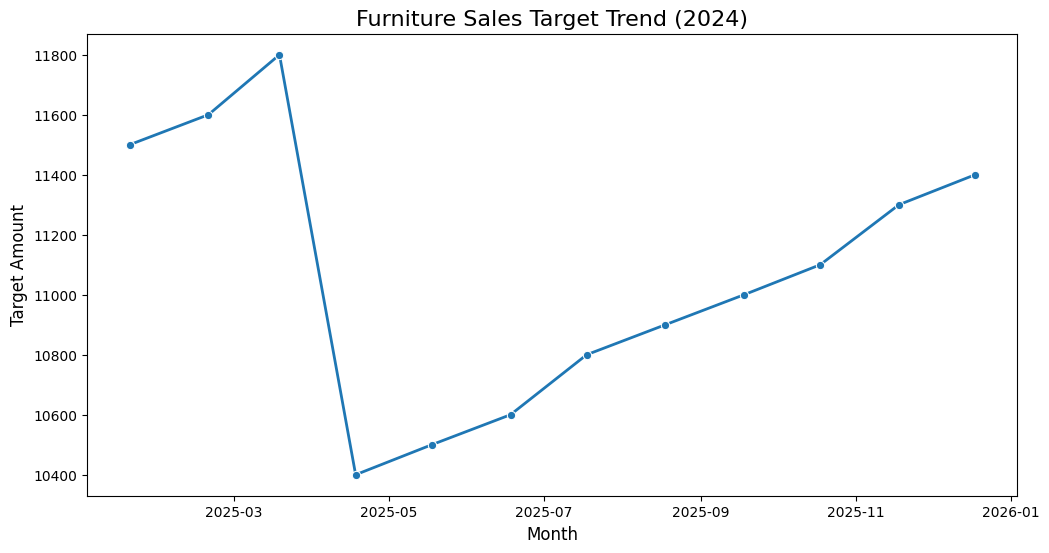

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("\n\n--- === Part 2: Target Achievement Analysis === ---")

df_targets['Month of Order Date'] = pd.to_datetime(df_targets['Month of Order Date'], format='%d-%m-%Y')
df_furniture = df_targets[df_targets['Category'] == 'Furniture'].copy()
df_furniture = df_furniture.sort_values(by='Month of Order Date')
df_furniture['Target % Change (MoM)'] = df_furniture['Target'].pct_change() * 100

print("\n--- Furniture Target Analysis (Month-over-Month) ---")
print(df_furniture[['Month of Order Date', 'Target', 'Target % Change (MoM)']])

print("\n\n--- === Part 2: Furniture Target Visuals === ---")

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_furniture,
    x='Month of Order Date',
    y='Target',
    marker='o',
    linewidth=2
)
plt.title('Furniture Sales Target Trend (2024)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Target Amount', fontsize=12)
plt.show()



--- === Part 3: Regional Performance Insights === ---

--- Top 5 States by Order Count ---
State
Madhya Pradesh    101
Maharashtra        90
Rajasthan          32
Gujarat            27
Punjab             25
Name: count, dtype: int64

--- Top 5 States Performance ---
                Total Orders  Total Sales  Average Profit per Order
State                                                              
Madhya Pradesh           101       105140                 54.960396
Maharashtra               90        95348                 68.622222
Rajasthan                 32        21149                 39.281250
Gujarat                   27        21058                 17.222222
Punjab                    25        16786                -24.360000


--- === Part 3: Top 5 States Performance Visuals === ---


/tmp/ipython-input-1527248609.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


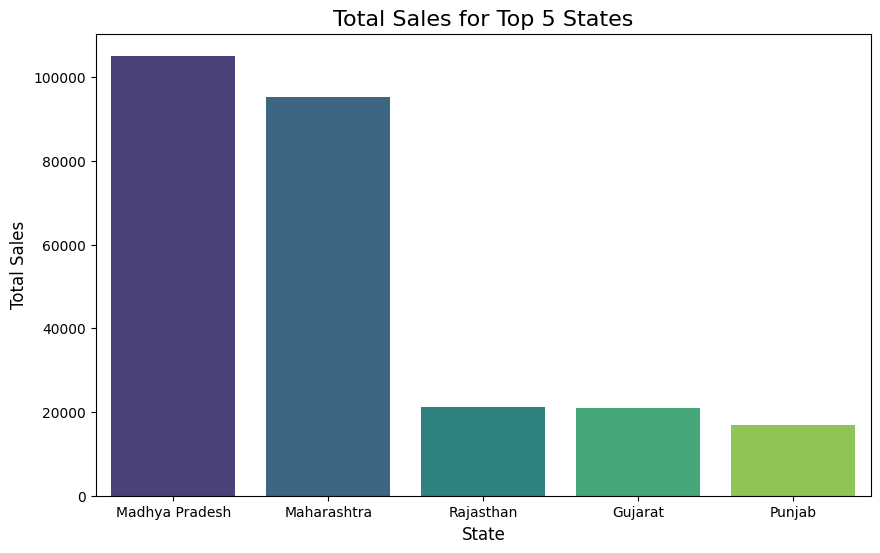

/tmp/ipython-input-1527248609.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


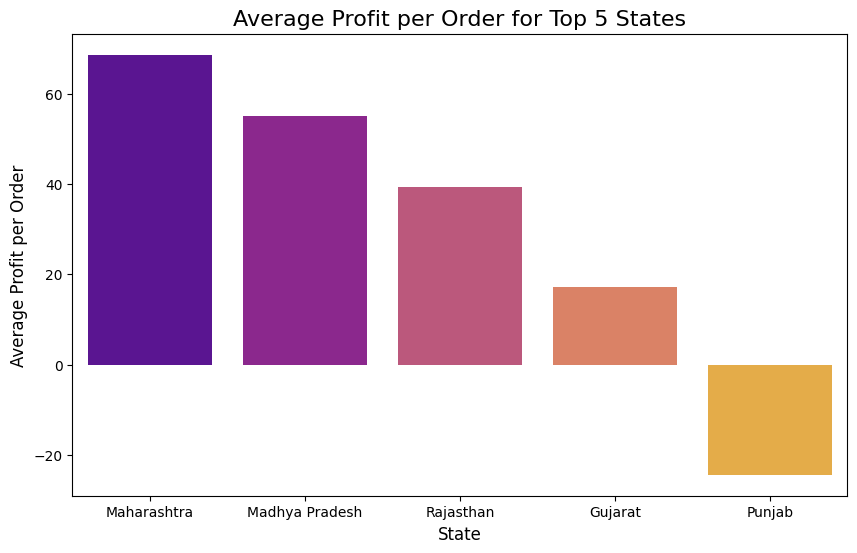

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This line assumes df_orders and df_details are already loaded
# It is required for the rest of the script to run
df_merged = pd.merge(df_orders, df_details, on='Order ID')

print("\n\n--- === Part 3: Regional Performance Insights === ---")

top_5_states = df_orders['State'].value_counts().head(5)
print("\n--- Top 5 States by Order Count ---")
print(top_5_states)

top_5_state_names = top_5_states.index.tolist()

df_top_states = df_merged[df_merged['State'].isin(top_5_state_names)]

top_states_sales = df_top_states.groupby('State')['Amount'].sum()

order_profit_top_states = df_top_states.groupby(['State', 'Order ID'])['Profit'].sum()
avg_profit_top_states = order_profit_top_states.groupby('State').mean()

df_top_states_performance = pd.DataFrame({
    'Total Orders': top_5_states,
    'Total Sales': top_states_sales,
    'Average Profit per Order': avg_profit_top_states
})

df_top_states_performance = df_top_states_performance.sort_values(by='Total Orders', ascending=False)

print("\n--- Top 5 States Performance ---")
print(df_top_states_performance)

print("\n\n--- === Part 3: Top 5 States Performance Visuals === ---")

df_top_states_plot = df_top_states_performance.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top_states_plot.sort_values(by='Total Sales', ascending=False),
    x='State',
    y='Total Sales',
    palette='viridis'
)
plt.title('Total Sales for Top 5 States', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_top_states_plot.sort_values(by='Average Profit per Order', ascending=False),
    x='State',
    y='Average Profit per Order',
    palette='plasma'
)
plt.title('Average Profit per Order for Top 5 States', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Profit per Order', fontsize=12)
plt.show()